In [1]:
import torch

In [36]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, data_home=".")

In [43]:
import numpy as np
X = mnist.data
X = np.array(X)
X = X.astype(np.int32)
X = X / 255
y = mnist.target
y = np.array(y)
y = y.astype(np.int32)

この画像データのラベルは5です


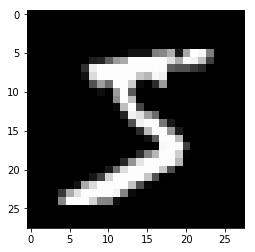

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(X[0].reshape(28, 28), cmap='gray')
print("この画像データのラベルは{:.0f}です".format(y[0]))

In [45]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1/7, random_state=0)

X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)

loader_train = DataLoader(ds_train, batch_size=62, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)

In [46]:
from torch import nn

model = nn.Sequential()
model.add_module('fc1', nn.Linear(28*28*1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 10))

print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [47]:
from torch import optim

loss_fn = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=0.01)

In [48]:
def train(epoch):
    model.train()

    for data, targets in loader_train:

        optimizer.zero_grad()
        outputs = model(data)
        loss = loss_fn(outputs, targets)

        loss.backward()
        optimizer.step()

    print("epoch{} : 終了\n".format(epoch))

In [49]:
def test():
    model.eval()
    correct = 0

    with torch.no_grad():
        for data, targets in loader_test:

            outputs = model(data)

            _, predicted = torch.max(outputs.data, 1)
            correct += predicted.eq(targets.data.view_as(predicted)).sum()

    data_num = len(loader_test.dataset)
    print('\nテストデータの正解率 : {}/{} ({:.0f}%)\n'
        .format(correct, data_num, 100. * correct / data_num))

In [56]:
test()


テストデータの正解率 : 1186/10000 (12%)



In [57]:
for epoch in range(3):
    train(epoch)

test()

epoch0 : 終了

epoch1 : 終了

epoch2 : 終了


テストデータの正解率 : 9554/10000 (96%)



予測結果は2
この画像データの正解ラベルは2です


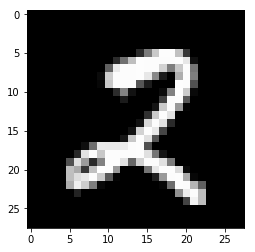

In [58]:
index = 2018

model.eval()
data = X_test[index]
output = model(data)
_, predicted = torch.max(output.data, 0)

print("予測結果は{}".format(predicted))

X_test_show = (X_test[index]).numpy()
plt.imshow(X_test_show.reshape(28, 28), cmap = 'gray')
print("この画像データの正解ラベルは{:.0f}です".format(y_test[index]))